### 1) IMPORTING IMPORTANT LIBRARIES:

In [3]:
# INSTALLING NLTK, GENSIM AND WORDCLOUD
!pip install --upgrade pip
!pip install nltk
!pip install gensim
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

    100% |████████████████████████████████| 1.6MB 255kB/s eta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


In [4]:
resume_df = pd.read_csv('Dataset/resume.csv', encoding = 'latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
5,resume_6,not_flagged,\rPoultney VT - Email me on Indeed: indeed.com...
6,resume_7,not_flagged,\rMedical Laboratory Scientist (Special Chemis...
7,resume_8,flagged,Statistician\rBurlington VT - Email me on Inde...
8,resume_9,not_flagged,Research technician\rBurlington VT - Email me ...
9,resume_10,not_flagged,Barbara Hennessey-Elzohairy\rNewport VT - Emai...


In [5]:
resume_df = resume_df[['resume_text', 'class']]
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
5,\rPoultney VT - Email me on Indeed: indeed.com...,not_flagged
6,\rMedical Laboratory Scientist (Special Chemis...,not_flagged
7,Statistician\rBurlington VT - Email me on Inde...,flagged
8,Research technician\rBurlington VT - Email me ...,not_flagged
9,Barbara Hennessey-Elzohairy\rNewport VT - Emai...,not_flagged


### 2) PERFORMING EXPLORATORY DATA ANALYSIS:

In [6]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
resume_text    125 non-null object
class          125 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [7]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [8]:
# HERE WE OBSERVE, WE HAVE NO NULL POINTS IN OUR DATASET
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)
resume_df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
5,\rPoultney VT - Email me on Indeed: indeed.com...,0
6,\rMedical Laboratory Scientist (Special Chemis...,0
7,Statistician\rBurlington VT - Email me on Inde...,1
8,Research technician\rBurlington VT - Email me ...,0
9,Barbara Hennessey-Elzohairy\rNewport VT - Emai...,0


### 4) PERFORMING DATA CLEANING:

In [9]:
# PREMOVING UNNECESSARY WORDS FROM DATASET

resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x .replace('\r', ''))

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 'edu', 're', 'use', 'email', 'com'])

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
resume_df

,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
5,Poultney VT - Email me on Indeed: indeed.com/r...,0
6,Medical Laboratory Scientist (Special Chemistr...,0
7,StatisticianBurlington VT - Email me on Indeed...,1
8,Research technicianBurlington VT - Email me on...,0
9,Barbara Hennessey-ElzohairyNewport VT - Email ...,0


In [11]:
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
5,Poultney VT - Email me on Indeed: indeed.com/r...,0,poultney cbf fba organized independent worker ...
6,Medical Laboratory Scientist (Special Chemistr...,0,medical laboratory scientist special chemistry...
7,StatisticianBurlington VT - Email me on Indeed...,1,secure position allow growth development work ...
8,Research technicianBurlington VT - Email me on...,0,research young enthusiastic scientist previous...
9,Barbara Hennessey-ElzohairyNewport VT - Email ...,0,barbara hennessey barbara hennessey elzohairy ...


In [12]:
resume_df['cleaned'][0]

'customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research pro

### 5) VISUALIZING CLEANED DATASETS

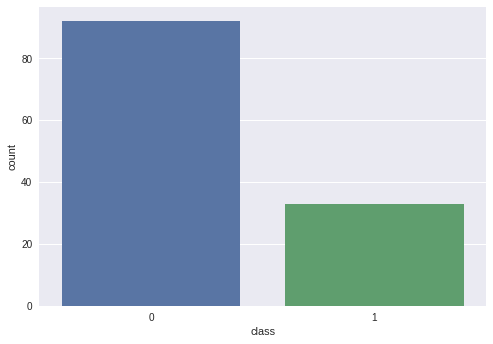

In [13]:
# PLOTTING COUNTS OF SAMPLE LABELLED AS 1 AND 0
sns.countplot(resume_df['class'], label = 'Count Plot')
plt.show()

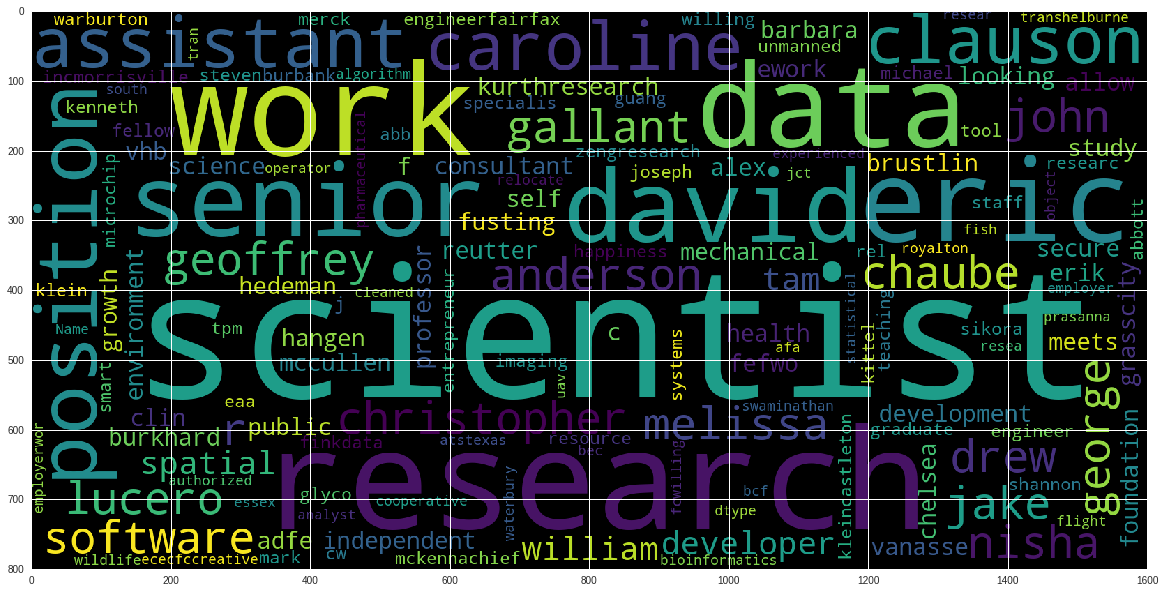

In [15]:
# PLOTTING THE WORDCLOUD:

# 1) FOR CLASS 1:

%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))

plt.imshow(wc)

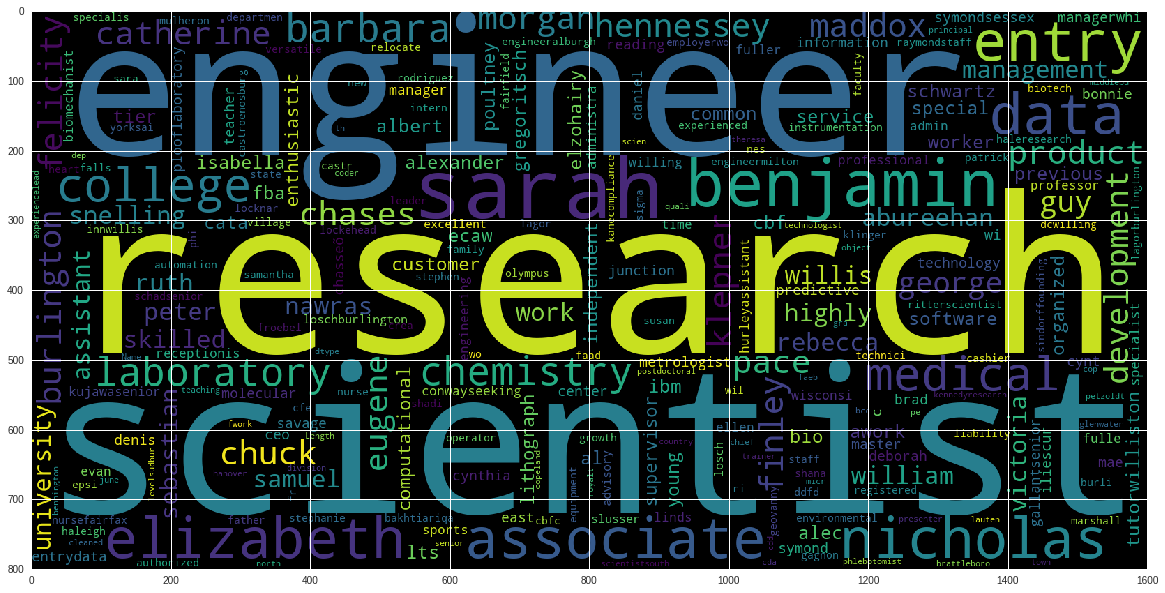

In [16]:
#1) FOR CLASS 0:

%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))

plt.imshow(wc)

### 6) PREPARING THE DATA BY APPLYING COUNT VECTORIZATION:

In [17]:
# CONVERTING SENTENCES INTO TOKENIZED FORMS AND THEN CONVERTING TO NUMERICAL VALUES IN ORDER FOR THE MODEL TO TRAIN:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

print(vectorizer.get_feature_names())

['aaalac', 'aabb', 'aac', 'aacn', 'aacr', 'aacrjournals', 'aakeroõ_y', 'aanpcp', 'aaron', 'abbott', 'abdomen', 'abdominal', 'abdul', 'aberdeen', 'abi', 'abilities', 'ability', 'abiotic', 'able', 'abnormal', 'aboard', 'abosalem', 'abraham', 'abreast', 'abs', 'absence', 'absorbance', 'abstract', 'abstracta', 'abstractdisease', 'abstracted', 'abstractin', 'abstracts', 'abualrub', 'abundance', 'abureehan', 'abuse', 'abusiness', 'academia', 'academic', 'academics', 'academy', 'acaeefbc', 'accelerated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accidents', 'accolateî', 'accommodations', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accreditation', 'accredited', 'accrual', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accustomed'

In [18]:
# PROCESSED DATA:
print(countvectorizer.toarray())

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


### 7) TRAINING A NAIVE BAYES CLASSIFER:

In [89]:
X = countvectorizer
y = resume_df['class']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


from sklearn.naive_bayes import MultinomialNB

Bayes_clf = MultinomialNB(alpha = 3)
Bayes_clf.fit(X_train, y_train)  ## Training the model


MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

### 8) ASSESING THE TRAINED MODEL:

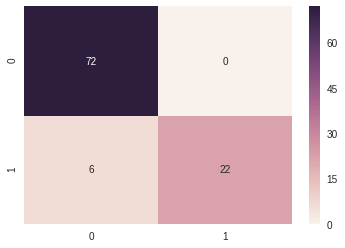

In [90]:
%matplotlib inline

# PLOTTING CONFUSION MATRIX:

# 1) FOR TRAINING DATA

y_pred_train = Bayes_clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True)

plt.show()

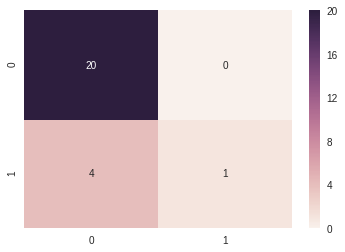

In [91]:
%matplotlib inline

# WE CAN SEE OUR MODEL PERFORMED REALLY WELL ON TRAINING DATA: IT CLASSFIED ALL OF THE POINTS CORRECTLY

# 2) FOR TEST DATA:

y_pred_test = Bayes_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True)

plt.show()

In [92]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91        20
          1       1.00      0.20      0.33         5

avg / total       0.87      0.84      0.79        25



In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy of model on Train Dataset = {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy of model on Test Dataset = {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of model on Train Dataset = 0.94
Accuracy of model on Test Dataset = 0.84


In [95]:
print("Accuracy of model is = {}".format(accuracy_score(y_test, y_pred_test)))
print("F1 of model is = {}".format(f1_score(y_test, y_pred_test)))
print("Precision of model is = {}".format(precision_score(y_test, y_pred_test)))
print("Recall of model is = {}".format(recall_score(y_test, y_pred_test)))

Accuracy of model is = 0.84
F1 of model is = 0.33333333333333337
Precision of model is = 1.0
Recall of model is = 0.2
